In [2]:
import numpy as np

In [3]:
def coef(a, phi):
    ca = np.cos(a)
    sa = np.sin(a)
    pha = np.exp(1j*phi)
    return (ca - sa*pha)/(ca+sa*pha)

In [4]:
from matplotlib import pyplot as plt

In [7]:
phi_line = np.linspace(0, np.pi, 100)
theta = np.pi/3

coefs = coef(theta, phi_line)


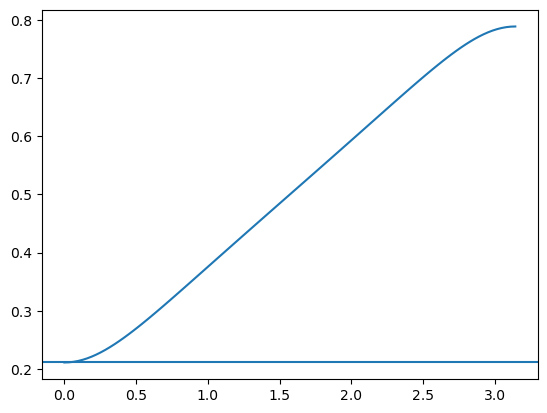

In [13]:
plt.plot(phi_line, np.abs(coefs)/(1+np.abs(coefs)))
plt.axhline(np.abs(coef(theta, 0))/(1+np.abs(coef(theta, 0))))

In [14]:
import sympy as scp

In [21]:
theta, phi = scp.symbols("\\theta, \\phi", real=True)

In [22]:
theta

\theta

In [23]:
amplitude =(scp.cos(theta) - scp.sin(theta)*scp.exp(1j*phi))/(scp.cos(theta) + scp.sin(theta)*scp.exp(1j*phi))


In [24]:
amplitude.conjugate()

(cos(\theta) - exp(-1.0*I*\phi)*sin(\theta))/(cos(\theta) + exp(-1.0*I*\phi)*sin(\theta))

In [25]:
amplitude.conjugate() * amplitude

(-exp(1.0*I*\phi)*sin(\theta) + cos(\theta))*(cos(\theta) - exp(-1.0*I*\phi)*sin(\theta))/((exp(1.0*I*\phi)*sin(\theta) + cos(\theta))*(cos(\theta) + exp(-1.0*I*\phi)*sin(\theta)))

The above measure the amplitude is only permitted for separable states.

---

In [181]:
import numpy as np
N = 2
A = np.matrix(np.random.random((N,N))) + 1j*np.matrix(np.random.random((N, N)))
A.getH()

matrix([[0.73798247-0.71266976j, 0.94811034-0.3754149j ],
        [0.50555746-0.31314527j, 0.1144313 -0.31362347j]])

In [182]:
H = 10*A.getH()@A
eins, evectors = np.linalg.eig(H)

In [183]:
eins, evectors

(array([24.42420488+5.18372827e-16j,  1.15047894-1.06891145e-16j]),
 matrix([[ 0.92173335+0.j        , -0.38340837-0.05835803j],
         [ 0.38340837-0.05835803j,  0.92173335+0.j        ]]))

In [184]:
from copy import deepcopy

In [185]:
ein = eins[0]
evec = evectors[0]

In [186]:
ein, evec.reshape(-1,N)

((24.424204875221452+5.183728273787687e-16j),
 matrix([[ 0.92173335+0.j        , -0.38340837-0.05835803j]]))

In [187]:
rs = []
thetas = []
for i in range(N):
    a = deepcopy(evectors[0, i])
    print(a)
    r =np.sqrt(a.real**2 + a.imag**2)
    theta = np.arccos(a.real/r)
    rs.append(r)
    thetas.append(theta)
    print("cal:", r*np.exp(1j*theta))
rs = np.array(rs)
thetas = np.array(thetas)

(0.9217333455734321+0j)
cal: (0.9217333455734321+0j)
(-0.38340837159545565-0.05835803499544051j)
cal: (-0.38340837159545565+0.058358034995440476j)


In [188]:
H_test = deepcopy(H)

In [189]:
H_test

matrix([[20.92365869+3.00459380e-16j,  8.22494129+1.25190644e+00j],
        [ 8.22494129-1.25190644e+00j,  4.65102513+2.06547030e-16j]])

In [191]:
h_r = []
h_theta = []
for i in range(N):
    h_radi = []
    h_angle = []
    for j in range(N):
        a = H_test[i, j]
        r =np.sqrt(a.real**2 + a.imag**2)
        theta = np.arccos(a.real/r) if i == j else np.arcsin(a.imag/r)
        h_radi.append(r)
        h_angle.append(theta)
    h_r.append(h_radi)
    h_theta.append(h_angle)
h_r = np.matrix(h_r)
h_theta = np.matrix(h_theta)

In [192]:
h_r

matrix([[20.92365869,  8.3196712 ],
        [ 8.3196712 ,  4.65102513]])

In [193]:
h_theta

matrix([[ 0.       ,  0.1510492],
        [-0.1510492,  0.       ]])

In [194]:
dphi = []
for i in range(N):
    dphi.append(thetas - thetas[i])
dphis = np.vstack(dphi)

In [195]:
dphis

array([[ 0.        ,  2.99054345],
       [-2.99054345,  0.        ]])

In [196]:
h_p_theta = h_theta + dphis # final angle

In [211]:
h_p_theta

matrix([[ 0.        ,  3.14159265],
        [-3.14159265,  0.        ]])

In [212]:
h_p_addi = np.zeros((N, N))

In [213]:
for i in range(N):
    numer = rs[i]
    for j in range(N):
        h_p_addi[i,j] = rs[j]/numer

In [214]:
h_r

matrix([[20.92365869,  8.3196712 ],
        [ 8.3196712 ,  4.65102513]])

In [215]:
h_p_addi

array([[1.        , 0.42075535],
       [2.37667803, 1.        ]])

In [216]:
np.multiply(h_p_addi,np.cos(h_p_theta))

matrix([[ 1.        , -0.42075535],
        [-2.37667803,  1.        ]])

In [217]:
factor = np.multiply(h_r, h_p_addi)
factor

matrix([[20.92365869,  3.50054618],
        [19.77317975,  4.65102513]])

In [222]:
ein.real

24.424204875221452

In [223]:
np.multiply(factor,np.sin(h_p_theta)).sum(axis=0)

matrix([[-2.42151613e-15, -1.12586152e-15]])

In [220]:
sum([-39.554658  , -83.67283976, -33.76284924,   0.        ])

-156.990347

In [160]:
h_p_r

array([[23.66681561, 22.39343937, 20.96903036, 10.6108827 ],
       [ 5.76636333, 14.45306299,  8.05742431,  5.42410978],
       [24.77315862, 36.96732855, 32.77662852, 17.88156738],
       [47.32771429, 93.95313695, 67.50976023, 41.47308543]])

In [148]:
((h_p_r*np.exp(1j*h_p_theta)).imag).sum(axis=1)

matrix([[28.12990486],
        [12.68823554],
        [30.4445224 ],
        [74.3456179 ]])